# Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns

In [2]:
#! git clone https://github.com/WongKinYiu/yolov7.git

In [4]:
%cd yolov7

/home/robin/Desktop/yolov7/yolo7_kpts_xtract/yolov7


In [4]:
import torch
from torchvision import transforms

from utils.datasets import letterbox
from utils.general import non_max_suppression_kpt
from utils.plots import output_to_keypoint, plot_skeleton_kpts

import matplotlib.pyplot as plt
import cv2
import numpy as np

/home/robin/anaconda3/envs/text_extraction/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
def load_model():
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model = torch.load('/home/robin/Desktop/yolov7/yolo7_kpts_xtract/yolov7/yolov7-w6-pose.pt', map_location=device)['model']
    # Put in inference mode
    model.float().eval()

    if torch.cuda.is_available():
        # half() turns predictions into float16 tensors
        # which significantly lowers inference time
        model.half().to(device)
    return model

model = load_model()

In [6]:
def run_inference(url):
    image = cv2.imread(url) # shape: (480, 640, 3)
    # Resize and pad image
    image = letterbox(image, 960, stride=64, auto=True)[0] # shape: (768, 960, 3)
    # Apply transforms
    image = transforms.ToTensor()(image) # torch.Size([3, 768, 960])
    # Turn image into batch
    image = image.unsqueeze(0) # torch.Size([1, 3, 768, 960])
    output, _ = model(image) # torch.Size([1, 45900, 57])
    return output, image

In [7]:
def visualize_output(output, image):
    output = non_max_suppression_kpt(output, 
                                     0.25, # Confidence Threshold
                                     0.65, # IoU Threshold
                                     nc=model.yaml['nc'], # Number of Classes
                                     nkpt=model.yaml['nkpt'], # Number of Keypoints
                                     kpt_label=True)
    with torch.no_grad():
        output = output_to_keypoint(output)
    nimg = image[0].permute(1, 2, 0) * 255
    nimg = nimg.cpu().numpy().astype(np.uint8)
    nimg = cv2.cvtColor(nimg, cv2.COLOR_RGB2BGR)
    
    
    
    for idx in range(output.shape[0]):
        plot_skeleton_kpts(nimg, output[idx, 7:].T, 3)
        kpts = (output[idx,7:].T)

        print(kpts)
#         landmarks = output[idx,7:].T
#         print("landmarks",landmarks)
#         print(len(landmarks))
#     plt.figure(figsize=(12, 12))
#     plt.axis('off')
#     plt.imshow(nimg)
#     plt.show()
    
    cv2.imshow("res",nimg)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [10]:
output, image = run_inference('/home/robin/Desktop/assignment/images/images/Image_4.jpg') 
visualize_output(output, image)

/home/robin/anaconda3/envs/text_extraction/lib/python3.9/site-packages/torch/functional.py:482: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3070.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[     429.83      348.76     0.99535      421.84       283.7     0.99874      381.69      381.23     0.97683      518.47       216.3     0.91029      398.81      429.56     0.17844      729.24      231.99     0.55445      566.29      532.53     0.75505         853      198.38     0.16084      426.26      553.01
     0.33805      743.46      173.06     0.25613      317.22       376.1     0.47167      871.24      287.07    0.093104      835.27      449.38      0.1367      848.82      300.15    0.076528      816.92      490.51     0.10875      792.76      437.29    0.048305       747.1       531.6    0.060636]


In [11]:
all_kpts = []

path = "/home/robin/Desktop/yolov7/yolo7_kpts_xtract/imgs/"

for f in os.listdir(path):
    img_path = path + f
    
    output, image = run_inference(img_path)
    output = non_max_suppression_kpt(output, 
                                     0.25, # Confidence Threshold
                                     0.65, # IoU Threshold
                                     nc=model.yaml['nc'], # Number of Classes
                                     nkpt=model.yaml['nkpt'], # Number of Keypoints
                                     kpt_label=True)
    
    with torch.no_grad():
        output = output_to_keypoint(output)
        
        for idx in range(output.shape[0]):
            kpts = (output[idx,7:].T)
            all_kpts.append(kpts)
            

print(all_kpts)
    

[array([     418.46,      403.97,     0.79962,      416.34,      317.69,     0.90865,      321.75,      394.91,     0.60157,       460.2,      211.47,     0.23838,      180.83,      337.81,     0.34994,      664.18,      164.66,     0.41392,      197.03,      490.25,     0.35296,      794.54,      277.78,     0.10455,
            284.45,      588.64,    0.039345,      650.12,      553.71,     0.14986,      288.05,      561.04,    0.080392,      854.48,      268.66,     0.03558,      651.39,      391.23,    0.032746,      720.58,      438.42,    0.032935,      710.39,      470.12,      0.0307,      643.88,      577.25,    0.017722,
            645.53,      579.96,    0.018314]), array([     429.83,      348.76,     0.99535,      421.84,       283.7,     0.99874,      381.69,      381.23,     0.97683,      518.47,       216.3,     0.91029,      398.81,      429.56,     0.17844,      729.24,      231.99,     0.55445,      566.29,      532.53,     0.75505,         853,      198.38,     0.1

In [14]:
all_kpts[0]

array([     418.46,      403.97,     0.79962,      416.34,      317.69,     0.90865,      321.75,      394.91,     0.60157,       460.2,      211.47,     0.23838,      180.83,      337.81,     0.34994,      664.18,      164.66,     0.41392,      197.03,      490.25,     0.35296,      794.54,      277.78,     0.10455,
            284.45,      588.64,    0.039345,      650.12,      553.71,     0.14986,      288.05,      561.04,    0.080392,      854.48,      268.66,     0.03558,      651.39,      391.23,    0.032746,      720.58,      438.42,    0.032935,      710.39,      470.12,      0.0307,      643.88,      577.25,    0.017722,
            645.53,      579.96,    0.018314])

In [15]:
ds = pd.DataFrame(columns = ["KPTS"])

ds["KPTS"] = all_kpts

In [16]:
ds

,KPTS
0,"[418.4575500488281, 403.9734191894531, 0.79961..."
1,"[429.829833984375, 348.75958251953125, 0.99534..."
2,"[358.8403625488281, 154.9840087890625, 0.99754..."


In [8]:
label_df = pd.read_csv("/home/robin/Desktop/yolov7/yolo7_kpts_xtract/labels.csv",header = None)
label_df = label_df.rename(columns={0: 'Name', 1: 'Label'})

In [9]:
label_df

,Name,Label
0,Image_1.jpg,sitting
1,Image_4.jpg,sleeping
2,Image_6.jpg,sleeping
3,Image_15.jpg,sleeping
4,Image_33.jpg,sitting
...,...,...
1264,Image_12527.jpg,running
1265,Image_12577.jpg,sleeping
1266,Image_12594.jpg,sleeping
1267,Image_12596.jpg,sitting


In [9]:
#label_df = label_df.drop(range(10,20),axis = 0)

In [11]:
#abel_df.reset_index(drop=True,inplace = True)

In [20]:
file_name = ["/home/robin/Desktop/yolov7/yolo7_kpts_xtract/imgs/" + fname for fname in label_df["Name"]]

file_name [:3]

['/home/robin/Desktop/yolov7/yolo7_kpts_xtract/imgs/Image_1.jpg',
 '/home/robin/Desktop/yolov7/yolo7_kpts_xtract/imgs/Image_4.jpg',
 '/home/robin/Desktop/yolov7/yolo7_kpts_xtract/imgs/Image_6.jpg']

In [22]:
for i in file_name[:1]:
    print(i)

/home/robin/Desktop/yolov7/yolo7_kpts_xtract/imgs/Image_1.jpg


In [23]:
test_all_kpts = []

#path = "/home/robin/Desktop/yolov7/yolo7_kpts_xtract/imgs/"

for f in file_name[:2]:
    
    output, image = run_inference(f)
    output = non_max_suppression_kpt(output, 
                                     0.25, # Confidence Threshold
                                     0.65, # IoU Threshold
                                     nc=model.yaml['nc'], # Number of Classes
                                     nkpt=model.yaml['nkpt'], # Number of Keypoints
                                     kpt_label=True)
    
    with torch.no_grad():
        output = output_to_keypoint(output)
        
        for idx in range(output.shape[0]):
            kpts = (output[idx,7:].T)
            test_all_kpts.append(kpts)
            

print(test_all_kpts)
    

[array([     358.84,      154.98,     0.99755,       392.2,      121.13,     0.99815,      336.64,      125.75,     0.97844,      465.88,      120.62,     0.98516,       317.3,      122.42,     0.21512,      552.92,      296.99,     0.97801,      277.33,      250.83,     0.96212,      543.29,      542.88,      0.8415,
            211.38,      435.82,     0.79195,       345.5,      587.01,     0.75286,      190.97,      484.76,      0.7304,      414.23,      605.21,     0.49617,      241.55,      575.74,     0.48232,      333.14,      596.57,      0.0362,      151.02,      564.51,    0.029527,      354.39,      612.64,   0.0077651,
            272.57,      601.61,   0.0064529]), array([     429.83,      348.76,     0.99535,      421.84,       283.7,     0.99874,      381.69,      381.23,     0.97683,      518.47,       216.3,     0.91029,      398.81,      429.56,     0.17844,      729.24,      231.99,     0.55445,      566.29,      532.53,     0.75505,         853,      198.38,     0.1

In [24]:
len(test_all_kpts)

2

In [12]:
# For all images

all_keypoints = []

In [13]:
file_names = ["/home/robin/Desktop/yolov7/yolo7_kpts_xtract/images/" + fname for fname in label_df["Name"]]

In [14]:

#file_names = ["/home/robin/Desktop/yolov7/yolo7_kpts_xtract/images/" + fname for fname in label_df["Name"]]

for f in file_names[:10]:
    
    output, image = run_inference(f)
    output = non_max_suppression_kpt(output, 
                                     0.25, # Confidence Threshold
                                     0.65, # IoU Threshold
                                     nc=model.yaml['nc'], # Number of Classes
                                     nkpt=model.yaml['nkpt'], # Number of Keypoints
                                     kpt_label=True)
    
    with torch.no_grad():
        output = output_to_keypoint(output)
        
        for idx in range(output.shape[0]):
            kpts = (output[idx,7:].T)
            all_keypoints.append(kpts)
            

/home/robin/anaconda3/envs/text_extraction/lib/python3.9/site-packages/torch/functional.py:482: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3070.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


**Due to the lackings of computational power in my local system i could not run the model for all images and could not extract keypoints for every images. So i used few of images and extracting the keypoints and stored in a new list. For appending this keypoints columns into the Label CSV the the length of index need to be the same.. So i am filling the rest of the columns as Null Value.**

In [21]:
len(all_keypoints)

11

In [22]:
len(label_df)

1269

In [24]:
for i in range(1257):
    kpt = ["NaN"]
    all_keypoints.append(kpt)

In [27]:
len(all_keypoints)

1269

In [28]:
label_df["Keypoints"] = all_keypoints

In [29]:
label_df

,Name,Label,Keypoints
0,Image_1.jpg,sitting,"[358.8403625488281, 154.9840087890625, 0.99754..."
1,Image_4.jpg,sleeping,"[429.829833984375, 348.75958251953125, 0.99534..."
2,Image_6.jpg,sleeping,"[418.4575500488281, 403.9734191894531, 0.79961..."
3,Image_15.jpg,sleeping,"[509.22998046875, 371.6900939941406, 0.9979376..."
4,Image_33.jpg,sitting,"[517.45166015625, 181.8089599609375, 0.9933015..."
...,...,...,...
1264,Image_12527.jpg,running,[NaN]
1265,Image_12577.jpg,sleeping,[NaN]
1266,Image_12594.jpg,sleeping,[NaN]
1267,Image_12596.jpg,sitting,[NaN]


In [30]:
#saving the dataFrame 

label_df.to_csv("Unbalanced_keypoints.csv")

# Balancing Imbalanced Dataset

In [2]:
import pandas as pd

In [5]:
df = pd.read_csv("Unbalanced_keypoints.csv")

In [11]:
df

,Unnamed: 0,Name,Label,Keypoints
0,0,Image_1.jpg,sitting,[ 358.84 154.98 0.99755 392...
1,1,Image_4.jpg,sleeping,[ 429.83 348.76 0.99535 421....
2,2,Image_6.jpg,sleeping,[ 418.46 403.97 0.79962 416....
3,3,Image_15.jpg,sleeping,[ 509.23 371.69 0.99794 523....
4,4,Image_33.jpg,sitting,[ 517.45 181.81 0.9933 522....
...,...,...,...,...
1264,1264,Image_12527.jpg,running,['NaN']
1265,1265,Image_12577.jpg,sleeping,['NaN']
1266,1266,Image_12594.jpg,sleeping,['NaN']
1267,1267,Image_12596.jpg,sitting,['NaN']


In [19]:
df.drop("Unnamed: 0",axis=1,inplace = True)

In [20]:
df["Label"].value_counts()

sleeping    700
sitting     379
running     190
Name: Label, dtype: int64

In [14]:
from sklearn.utils import resample

In [16]:
# sitting_downsample = resample(ham_messages,
#              replace=True,
#              n_samples=len(spam_messages),
#              random_state=42)

# print(ham_downsample.shape)

In [24]:
sleeping = df[df["Label"] == "sleeping"]
sitting = df[df["Label"] == "sitting"]
running  = df[df["Label"] == "running"]

print(sleeping.shape)
print(sitting.shape)
print(running.shape)

(700, 3)
(379, 3)
(190, 3)


# Downsampling with sklearn

In [25]:
sleeping_downsample = resample(sleeping,
             replace=True,
             n_samples=len(running),
             random_state=42)

print(sleeping_downsample.shape)

(190, 3)


In [26]:
sitting_downsample = resample(sitting,
             replace=True,
             n_samples=len(running),
             random_state=42)

print(sitting_downsample.shape)

(190, 3)


sleeping    190
sitting     190
running     190
Name: Label, dtype: int64


<AxesSubplot:ylabel='Type'>

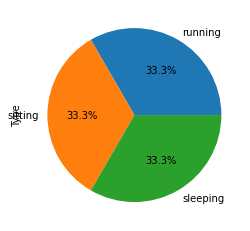

In [27]:
data_downsampled = pd.concat([sleeping_downsample,sitting_downsample, running])

print(data_downsampled["Label"].value_counts())

data_downsampled.groupby('Label').size().plot(kind='pie',
                                       y = "Label",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [29]:
# saving balanced keypoints dataset

data_downsampled.to_csv("Balanced_keypoints")

# Upsampling with sklearn

In [30]:
from sklearn.utils import resample

sitting_upsample = resample(sitting,
             replace=True,
             n_samples=len(sleeping),
             random_state=42)

print(sitting_upsample.shape)

running_upsample = resample(running,
             replace=True,
             n_samples=len(sleeping),
             random_state=42)

print(running_upsample.shape)

(700, 3)
(700, 3)


sleeping    700
sitting     700
running     700
Name: Label, dtype: int64


<AxesSubplot:ylabel='Type'>

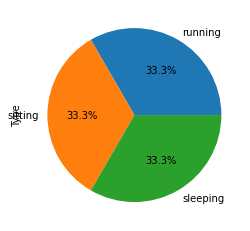

In [31]:
data_upsampled = pd.concat([sleeping,sitting_upsample, running_upsample])

print(data_upsampled["Label"].value_counts())

data_upsampled.groupby('Label').size().plot(kind='pie',
                                       y = "Label",
                                       label = "Type",
                                       autopct='%1.1f%%')